## Client Term Deposit Prediction

In [1]:
# importing libraries
import pandas as pd
import numpy as np                     # For mathematical calculations
import seaborn as sns                  # For data visualization
import matplotlib.pyplot as plt 
import seaborn as sn                   # For plotting graphs
%matplotlib inline
import warnings                        # To ignore any warnings
warnings.filterwarnings("ignore")

In [2]:
# loading the data
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'subscribed'],
      dtype='object')

In [4]:
test.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome'],
      dtype='object')

In [5]:
# checking data size
train.shape,test.shape

((31647, 18), (13564, 17))

In [6]:
#printing first five rows of the dataset
train.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


In [7]:
# Print data types for each variable
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          31647 non-null  int64 
 1   age         31647 non-null  int64 
 2   job         31647 non-null  object
 3   marital     31647 non-null  object
 4   education   31647 non-null  object
 5   default     31647 non-null  object
 6   balance     31647 non-null  int64 
 7   housing     31647 non-null  object
 8   loan        31647 non-null  object
 9   contact     31647 non-null  object
 10  day         31647 non-null  int64 
 11  month       31647 non-null  object
 12  duration    31647 non-null  int64 
 13  campaign    31647 non-null  int64 
 14  pdays       31647 non-null  int64 
 15  previous    31647 non-null  int64 
 16  poutcome    31647 non-null  object
 17  subscribed  31647 non-null  object
dtypes: int64(8), object(10)
memory usage: 4.3+ MB


In [8]:
#checking for missing values
train.isnull().sum()

ID            0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

In [9]:
#checking for duplicate value
train.duplicated().sum()

0

In [10]:
train.describe()

,ID,age,balance,day,duration,campaign,pdays,previous
count,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000
mean,22563.972162,40.957247,1363.890258,15.835466,258.113534,2.765697,39.576042,0.574272
std,13075.936990,10.625134,3028.304293,8.337097,257.118973,3.113830,99.317592,2.422529
min,2.000000,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,11218.000000,33.000000,73.000000,8.000000,104.000000,1.000000,-1.000000,0.000000
50%,22519.000000,39.000000,450.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,33879.500000,48.000000,1431.000000,21.000000,318.500000,3.000000,-1.000000,0.000000
max,45211.000000,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [11]:
train["campaign"]

0        2
1        2
2        1
3        1
4        1
        ..
31642    2
31643    2
31644    3
31645    7
31646    2
Name: campaign, Length: 31647, dtype: int64

In [12]:
print(train['job'].value_counts())
print(train['marital'].value_counts())
print(train['education'].value_counts())
print(train['default'].value_counts())
print(train['housing'].value_counts())
print(train['loan'].value_counts())
print(train['contact'].value_counts())
print(train['month'].value_counts())
print(train['poutcome'].value_counts())

blue-collar      6842
management       6639
technician       5307
admin.           3631
services         2903
retired          1574
self-employed    1123
entrepreneur     1008
unemployed        905
housemaid         874
student           635
unknown           206
Name: job, dtype: int64
married     19095
single       8922
divorced     3630
Name: marital, dtype: int64
secondary    16224
tertiary      9301
primary       4808
unknown       1314
Name: education, dtype: int64
no     31062
yes      585
Name: default, dtype: int64
yes    17584
no     14063
Name: housing, dtype: int64
no     26516
yes     5131
Name: loan, dtype: int64
cellular     20423
unknown       9177
telephone     2047
Name: contact, dtype: int64
may    9669
jul    4844
aug    4333
jun    3738
nov    2783
apr    2055
feb    1827
jan     977
oct     512
sep     410
mar     342
dec     157
Name: month, dtype: int64
unknown    25929
failure     3362
other       1288
success     1068
Name: poutcome, dtype: int64


## Univariate Analysis

In [13]:
train['subscribed'].value_counts()

no     27932
yes     3715
Name: subscribed, dtype: int64

In [14]:
# Normalize can be set to True to print proportions instead of number 
train['subscribed'].value_counts(normalize=True)

no     0.882611
yes    0.117389
Name: subscribed, dtype: float64

<AxesSubplot:>

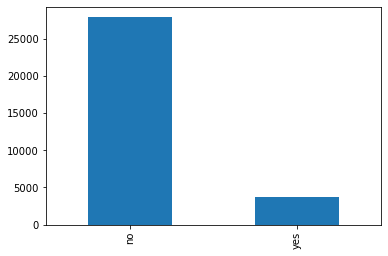

In [15]:
# plotting the bar plot of frequencies
train['subscribed'].value_counts().plot.bar()

### Numerical data

<AxesSubplot:xlabel='age', ylabel='Density'>

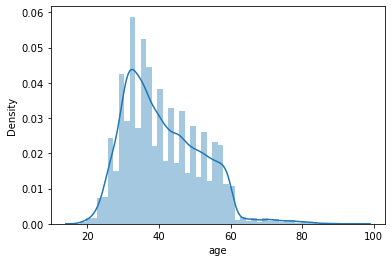

In [16]:
sn.distplot(train["age"])

<AxesSubplot:>

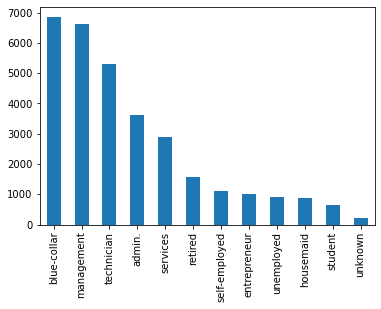

In [17]:
train['job'].value_counts().plot.bar()

<AxesSubplot:xlabel='balance', ylabel='Density'>

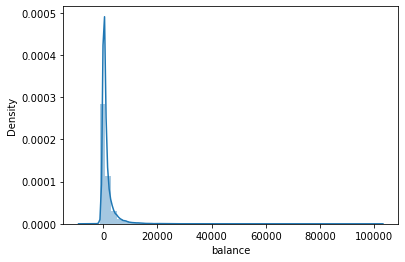

In [18]:
sn.distplot(train["balance"])

(array([7.349e+03, 9.756e+03, 5.732e+03, 3.114e+03, 1.827e+03, 1.152e+03,
        7.680e+02, 5.260e+02, 3.930e+02, 2.630e+02, 2.030e+02, 1.480e+02,
        1.130e+02, 7.500e+01, 6.100e+01, 4.500e+01, 2.400e+01, 1.900e+01,
        1.900e+01, 1.200e+01, 1.500e+01, 4.000e+00, 7.000e+00, 0.000e+00,
        4.000e+00, 3.000e+00, 3.000e+00, 1.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 2.000e+00, 1.000e+00, 2.000e+00, 2.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([   0.  ,   98.36,  196.72,  295.08,  393.44,  491.8 ,  590.16,
         688.52,  786.88,  885.24,  983.6 , 1081.96, 1180.32, 1278.68,
        1377.04, 1475.4 , 1573.76, 1672.12, 1770.48, 1868.84, 1967.2 ,
        2065.56, 2163.92, 2262.28, 2360.64, 2459.  , 2557.36, 2655.72,
        2754.08, 2852.44, 2950.8 , 3049.16, 3147.52, 3245.88, 3344.24,
        3442.6 , 3540

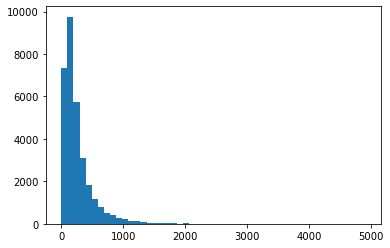

In [19]:
plt.hist(train['duration'],bins=50)

<AxesSubplot:xlabel='campaign', ylabel='Density'>

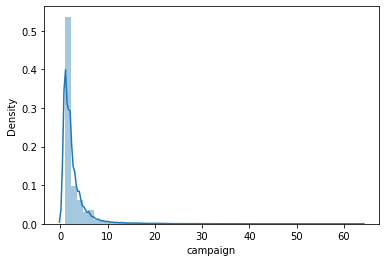

In [20]:
train["campaign"].value_counts().sort_index()
train["campaign"].min()
train["campaign"].max()
sn.distplot(train["campaign"])

### Categorical Data

<AxesSubplot:>

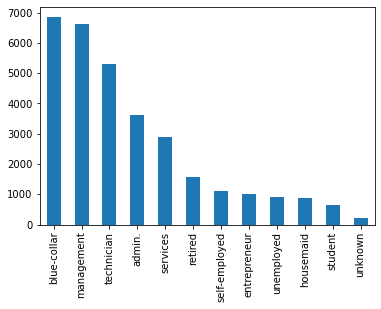

In [21]:
train['job'].value_counts().plot.bar()

<AxesSubplot:>

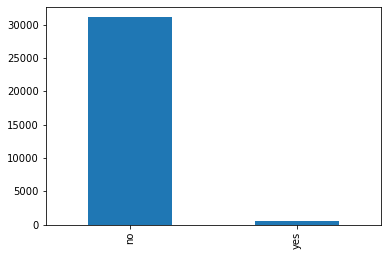

In [22]:
train['default'].value_counts().plot.bar()

<AxesSubplot:>

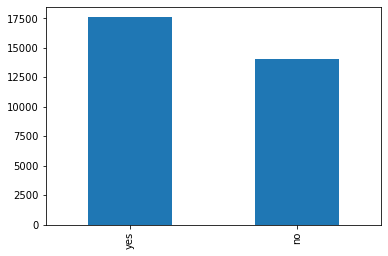

In [23]:
train['housing'].value_counts().plot.bar()

<AxesSubplot:>

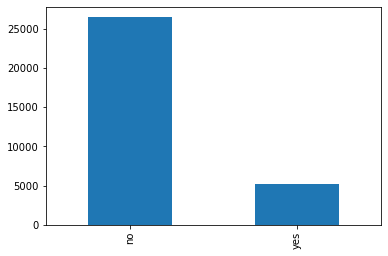

In [24]:
train['loan'].value_counts().plot.bar()

<AxesSubplot:>

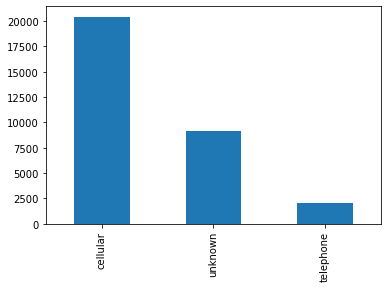

In [25]:
train['contact'].value_counts().plot.bar()

<AxesSubplot:>

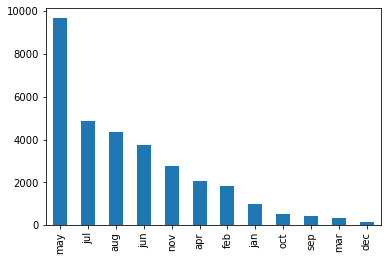

In [26]:
train['month'].value_counts().plot.bar()

## Bivariate Analysis

subscribed       no  yes
job                     
admin.         3179  452
blue-collar    6353  489
entrepreneur    923   85
housemaid       795   79
management     5716  923
retired        1212  362
self-employed   983  140
services       2649  254
student         453  182
technician     4713  594
unemployed      776  129
unknown         180   26


Text(0, 0.5, 'Percentage')

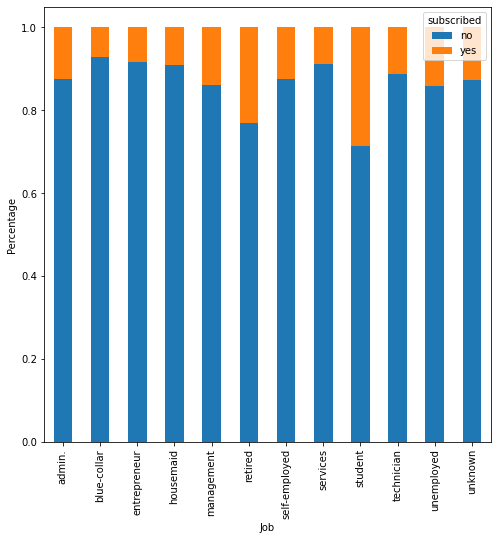

In [27]:
print(pd.crosstab(train['job'],train['subscribed']))

job=pd.crosstab(train['job'],train['subscribed'])
job.div(job.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(8,8))
plt.xlabel('Job')
plt.ylabel('Percentage')

subscribed     no   yes
default                
no          27388  3674
yes           544    41


Text(0, 0.5, 'Percentage')

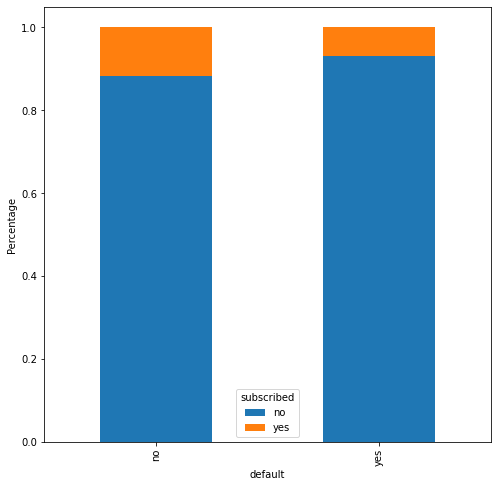

In [28]:
print(pd.crosstab(train['default'],train['subscribed']))

default=pd.crosstab(train['default'],train['subscribed'])
default.div(default.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(8,8))
plt.xlabel('default')
plt.ylabel('Percentage')

In [29]:
train['subscribed'].replace('no', 0,inplace=True)
train['subscribed'].replace('yes', 1,inplace=True)

<AxesSubplot:>

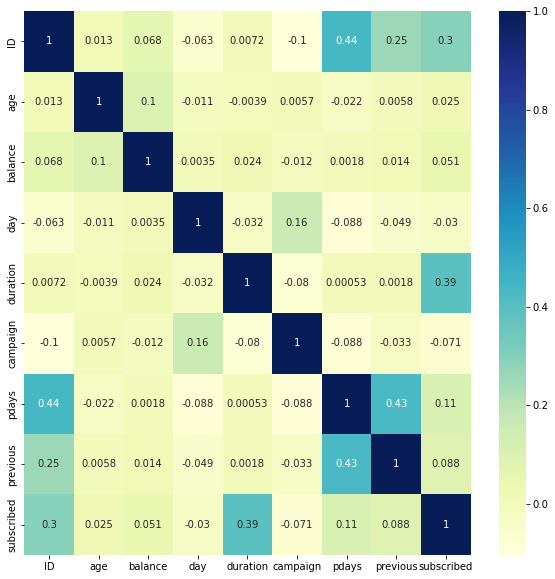

In [30]:
corr = train.corr()
corr
fig, ax = plt.subplots(figsize=(10, 10))
sn.heatmap(corr,annot=True,cmap="YlGnBu")

In [31]:
train.isnull().sum()

ID            0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

## Model Building

In [33]:
target = train['subscribed']
train = train.drop('subscribed',1)
train

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,36483,29,management,single,tertiary,no,0,yes,no,cellular,12,may,116,2,-1,0,unknown
31643,40178,53,management,divorced,tertiary,no,380,no,yes,cellular,5,jun,438,2,-1,0,unknown
31644,19710,32,management,single,tertiary,no,312,no,no,cellular,7,aug,37,3,-1,0,unknown
31645,38556,57,technician,married,secondary,no,225,yes,no,telephone,15,may,22,7,337,12,failure


In [34]:
# applying dummies on the train dataset
train = pd.get_dummies(train)

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
# splitting into train and validation with 20% data in validation set and 80% data in train set.
X_train, X_val, y_train, y_val = train_test_split(train, target, test_size = 0.2, random_state=12)

## Logistic Regression

In [37]:
from sklearn.linear_model import LogisticRegression

In [38]:
# defining the logistic regression model
lreg = LogisticRegression()

In [39]:
# fitting the model on  X_train and y_train
lreg.fit(X_train,y_train)

LogisticRegression()

In [40]:
# making prediction on the validation set
prediction = lreg.predict(X_val)

In [41]:
from sklearn.metrics import accuracy_score

In [42]:
# calculating the accuracy score
accuracy_score(y_val, prediction)

0.8903633491311217

## Decision Tree

In [43]:
from sklearn.tree import DecisionTreeClassifier

In [44]:
# defining the decision tree model with depth of 4, you can tune it further to improve the accuracy score
clf = DecisionTreeClassifier(max_depth=4, random_state=0)

In [45]:
# fitting the decision tree model
clf.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4, random_state=0)

In [46]:
# making prediction on the validation set
predict = clf.predict(X_val)

In [47]:
# calculating the accuracy score
accuracy_score(y_val, predict)

0.9042654028436019

In [48]:
test = pd.get_dummies(test)

In [50]:
test_prediction = clf.predict(test)

In [55]:
Result = pd.DataFrame()

In [57]:
# creating a Business_Sourced column and saving the predictions in it
Result['ID'] = test['ID']
Result['subscribed'] = test_prediction

In [60]:
Result.to_csv('PredictedResult.csv', header=True, index=False)

In [61]:
Result

,ID,subscribed
0,38441,0
1,40403,1
2,3709,0
3,37422,0
4,12527,0
...,...,...
13559,23465,0
13560,11743,0
13561,28292,0
13562,45163,1
